In [31]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np
from scipy.spatial.transform import Rotation
from AHRS import AHRS
from quaternions import quaternRotate

In [74]:
def convertData(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        if unsigned & (1 << 15) !=0:
            unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned / (1<< leftShift)
    return data

def convertDataHex(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        if not temp.isnumeric():
            unsigned = int(temp,16)
        else:
            unsigned = int(temp)
        #if unsigned & (1 << 15) !=0:
        #unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned# / (1<< leftShift)
    return data

def _str_to_int(data, column):
    """ Transform hex str into int. """
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)
        if unsigned >= 2**7:
            unsigned -= 2**8
        data.loc[i,column] = unsigned
    
    return data

# Conversio dades de temps a timestamp
def dateChange(data):
    fin = data.shape[0]
    i=0

    while i < fin:
        now = ("06/02/2022 " + data.at[i,"time"])
        date = datetime.strptime(now, "%m/%d/%Y %H:%M:%S.%f")
        timestamp = datetime.timestamp(date)
        data.at[i,"time"]= timestamp
        i=i+1


def all_non_consecutive(arr):
    ans = []
    start = arr[0]
    index = 0
    for number in arr:
        if start == number:
            start += 1
            index += 1
            continue

        ans.append({'i': index, 'n': number})
        start = number + 1
        index += 1

    return ans

In [3]:
def grafica(llista):
    temp = all_non_consecutive(llista)
    llista_resultat=[]
    aux_llista=[]
    aux_llista.append(llista[0])
    for i in temp:
        aux_llista.append(llista[i["i"]-1])
        aux_llista.append(i["n"])
    aux_llista.append(llista[-1])

    #print(aux_llista)
    i=0
    while i < len(aux_llista):
        #balance_test.loc[aux_llista[i]:aux_llista[i+1]].plot(subplots=True, layout=())
        #new_df = balance_test[["accelerometerX","accelerometerY","accelerometerZ"]]
        new_df = balance_test.loc[aux_llista[i]:aux_llista[i+1]]
        new_df.reset_index(inplace=True, drop=True)
        llista_resultat.append(new_df)
        i=i+2
    return llista_resultat


In [242]:
dades = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_vm54f_DATA_15-03-2023_HORA_17-07-28.351.csv", delimiter=";")
dades

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,FBDB,000A,FFC9,FFF5,FDDF,FF7B,...,0000,C11C5009,3F585BF6,BDFAAEB8,1698BAB7,29323536,1366C86A,D91E0EAE,NaN,NaN
1,1678895197569,vm54f,0,0,FC07,002C,FFB5,000E,FDF1,FF5A,...,0000,C11C5D85,3F4FC745,BD89E7F1,1699F9E5,290B7A54,136D1937,D8F90BCD,NaN,NaN
2,1678895197572,vm54f,0,0,FC08,0042,FFA9,FFFB,FE85,FF94,...,FE1B,C11C6B01,3F4629CD,BC21CF4A,16943099,28E5098F,136F2071,D8CE718E,NaN,NaN
3,1678895197592,vm54f,0,0,FBF0,0045,FF8F,FFE9,FE47,FFBF,...,0000,C11C725C,3F4039C5,3CD2D7CD,1647637A,28F10CD5,13241B6D,D88A58F4,NaN,NaN
4,1678895197618,vm54f,0,0,FC20,0029,FF77,003B,FDB0,FFF0,...,0000,C11C7609,3F3CD0FB,3D57BF0E,1646EE54,28DFE65C,13232CCB,D877E086,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,FC11,0050,000D,FF3F,0018,FFEF,...,0000,C11C7433,3F3EB181,3CC695AD,F43EA36F,2AA25733,F0FDF8D3,D43D8907,NaN,NaN
50067,1678896448052,vm54f,0,0,FC06,0048,0006,FF45,0005,FFDB,...,0000,C11C7396,3F3F09C4,3CD0642D,F44E0A23,2AA67EF2,F10BC6C4,D438BBB7,NaN,NaN
50068,1678896448082,vm54f,0,0,FC01,0046,FFFF,FF5D,FFF3,FFDB,...,0185,C11C756D,3F3DA8BA,3CBE00FC,F459FE3E,2AADD9DD,F11CBE94,D436EEB5,NaN,NaN
50069,1678896448104,vm54f,0,0,FC01,004F,FFF8,FF70,0018,FFC8,...,0000,C11C77E0,3F3BBE64,3CB0850B,F43B5F0F,2AA718E3,F106975B,D4401927,NaN,NaN


In [243]:
#print(dades["time"])
convertData(dades,"accelerometerX",10)
convertData(dades,"accelerometerY",10)
convertData(dades,"accelerometerZ",10)

convertDataHex(dades,"gravityVectorX",10)
convertDataHex(dades,"gravityVectorY",10)
convertDataHex(dades,"gravityVectorZ",10)

#convertDataHex(dades,"quaternionW",10)
#convertDataHex(dades,"quaternionX",10)
#convertDataHex(dades,"quaternionY",10)
#convertDataHex(dades,"quaternionZ",10)

convertDataHex(dades,"gyroscopeX",10)
convertDataHex(dades,"gyroscopeY",10)
convertDataHex(dades,"gyroscopeZ",10)
#print(dades)

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,-1.036133,0.009766,-0.053711,65525,64991,65403,...,0000,3239858185,1062755318,3187322552,1698BAB7,29323536,1366C86A,D91E0EAE,NaN,NaN
1,1678895197569,vm54f,0,0,-0.993164,0.042969,-0.073242,14,65009,65370,...,0000,3239861637,1062192965,3179931633,1699F9E5,290B7A54,136D1937,D8F90BCD,NaN,NaN
2,1678895197572,vm54f,0,0,-0.992188,0.064453,-0.084961,65531,65157,65428,...,FE1B,3239865089,1061562829,3156332362,16943099,28E5098F,136F2071,D8CE718E,NaN,NaN
3,1678895197592,vm54f,0,0,-1.015625,0.067383,-0.110352,65513,65095,65471,...,0000,3239866972,1061173701,1020450765,1647637A,28F10CD5,13241B6D,D88A58F4,NaN,NaN
4,1678895197618,vm54f,0,0,-0.96875,0.040039,-0.133789,59,64944,65520,...,0000,3239867913,1060950267,1029160718,1646EE54,28DFE65C,13232CCB,D877E086,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,-0.983398,0.078125,0.012695,65343,18,65519,...,0000,3239867443,1061073281,1019647405,F43EA36F,2AA25733,F0FDF8D3,D43D8907,NaN,NaN
50067,1678896448052,vm54f,0,0,-0.994141,0.070312,0.005859,65349,5,65499,...,0000,3239867286,1061095876,1020290093,F44E0A23,2AA67EF2,F10BC6C4,D438BBB7,NaN,NaN
50068,1678896448082,vm54f,0,0,-0.999023,0.068359,-0.000977,65373,65523,65499,...,0185,3239867757,1061005498,1019085052,F459FE3E,2AADD9DD,F11CBE94,D436EEB5,NaN,NaN
50069,1678896448104,vm54f,0,0,-0.999023,0.077148,-0.007812,65392,18,65480,...,0000,3239868384,1060879972,1018201355,F43B5F0F,2AA718E3,F106975B,D4401927,NaN,NaN


In [250]:

balance_test = dades.loc[dades["test"]==5, ["action","accelerometerX", "accelerometerY", "accelerometerZ", "gravityVectorX", "gravityVectorY", "gravityVectorZ","gyroscopeX", "gyroscopeY", "gyroscopeZ" ]]

llista_ROA = balance_test.index[balance_test["action"] == 1].tolist()
llista_ROC = balance_test.index[balance_test["action"] == 2].tolist()
llista_RGA = balance_test.index[balance_test["action"] == 3].tolist()
llista_RGC = balance_test.index[balance_test["action"] == 4].tolist()
balance_test.drop("action", inplace=True, axis=1)
quaternions = balance_test.to_numpy()

In [245]:
def find_discontinuity(lst):
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1] + 1:
            return i, lst[i - 1] + 1

    return len(lst), lst[len(lst)-1]

In [10]:
result = find_discontinuity(llista_ROA)

if result:
    index, missing_value = result
    print("Discontinuity found at index {index}, missing value is {missing_value}.")
else:
    print("No discontinuity found.")

Discontinuity found at index {index}, missing value is {missing_value}.


In [251]:
index, missing_value = find_discontinuity(llista_ROA)
ROA1 = [*range(llista_ROA[0], missing_value)]

index, missing_value = find_discontinuity(llista_ROC)
ROC1 = [*range(llista_ROC[0], missing_value)]

index, missing_value = find_discontinuity(llista_RGA)
RGA1 = [*range(llista_RGA[0], missing_value)]

index, missing_value = find_discontinuity(llista_RGC)
RGC1 = [*range(llista_RGC[0], missing_value)]

In [247]:
resultat=[]
resultat=grafica(RGA1)

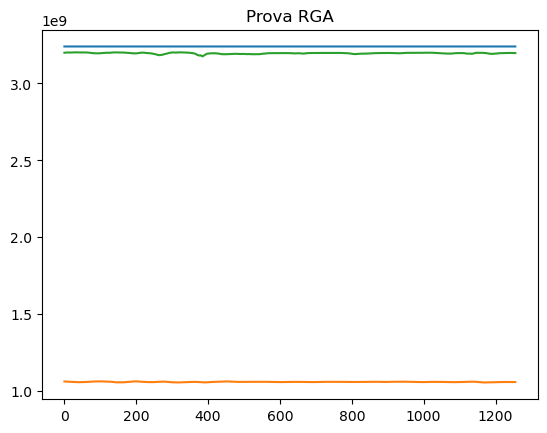

In [142]:
x=0
#for i in resultat:
    #i.plot(ax=axes[1,x] ,title="Espuma Ulls tancats")
resultat[0]["gravityVectorX"].plot()
resultat[0]["gravityVectorY"].plot()
resultat[0]["gravityVectorZ"].plot(title="Prova RGA")

plt.show()

In [282]:
resultat=[]
resultat=grafica(ROA1)

In [283]:
rotated_vector = np.array([1.0,0.0,0.0])
trajectoriax = [rotated_vector[0]]
trajectoriay = [rotated_vector[1]]
trajectoriaz = [rotated_vector[2]]

AHRSalgorithm = AHRS(SamplePeriod=1/40, Kp=1,Ki=1, KpInit=1)

for i in range(len(resultat[0])):
    AHRSalgorithm.Kp = 0
    AHRSalgorithm.UpdateIMU(resultat[0][['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].iloc[i].values.tolist(), 
                            resultat[0][['accelerometerX', 'accelerometerX', 'accelerometerX']].iloc[i].values.tolist())
    quaternions = AHRSalgorithm.Quaternion
    rotated_vector = quaternRotate(rotated_vector, quaternions)
    #print(rotated_vector)
    trajectoriax.append(trajectoriax[-1] + rotated_vector[0]*deltat)
    trajectoriay.append(trajectoriay[-1] + rotated_vector[1]*deltat)
    trajectoriaz.append(trajectoriaz[-1] + rotated_vector[2]*deltat)

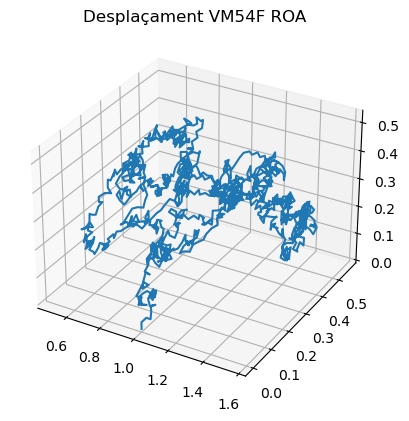

In [284]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

ax1.plot(trajectoriax, trajectoriay, trajectoriaz)
ax1.set_title("Desplaçament VM54F ROA")


plt.show()

## Comparació força posturògraf amb forces IMU(Normalitzades)

In [14]:
if False:
    reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", chunksize=1)
    df_dades = reader.get_chunk()
    #print(df_dades)
    print(df_dades.columns)
    """
    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1
    """


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)


df_dades = reader.get_chunk()

print(df_dades[17].item())
Val_ROA = df_dades[17].item() #ROA

print(df_dades[22].item())
Val_ROC = df_dades[22].item() #ROC

print(df_dades[27].item())
Val_RGA = df_dades[27].item() #RGA
Val_RGA = 0.0

print(df_dades[32].item())
Val_RGC = df_dades[32].item() #RGC
Val_RGC = 0.0

print(df_dades[53].item())
print(df_dades[54].item())
print(df_dades[55].item())

masa = df_dades[7]
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

100.0
100.0
100.0
0.0
100.0
98.864108
0.0
[[3.0, 100.0, 64.82313, 100.0, 100.0]]
[[3.0, 100.0, 64.410715, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[2.0, 0.0, 67.411831, 0.0, 0.0]]
[[100.0, 98.864108, 0.0]]
Total tests
10.0


In [16]:
df_dades_postu_FxFy  = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False, nrows = 1200)

### Força posturógraf

In [18]:
df_dades_postu_FxFy.columns

Index(['ROA1_Fx', 'ROA1_Fy', 'ROC2_Fx', 'ROC2_Fy', 'ROA3_Fx', 'ROA3_Fy',
       'ROC4_Fx', 'ROC4_Fy', 'ROA5_Fx', 'ROA5_Fy', 'ROC6_Fx', 'ROC6_Fy',
       'RGA7_Fx', 'RGA7_Fy', 'RGC8_Fx', 'RGC8_Fy', 'RGA9_Fx', 'RGA9_Fy',
       'RGC10_Fx', 'RGC10_Fy', 'Unnamed: 20'],
      dtype='object')

In [19]:
Test = 'RGC10_'

In [20]:
Fx_norm = normalize([np.array(df_dades_postu_FxFy[Test + 'Fx'])])
Fy_norm = normalize([np.array(df_dades_postu_FxFy[Test + 'Fy'])])

llista = list(range(0,len(Fx_norm[0])))

Diferència forces en x:  0.12752635737302967
Diferència forces en y:  0.23399826257883838


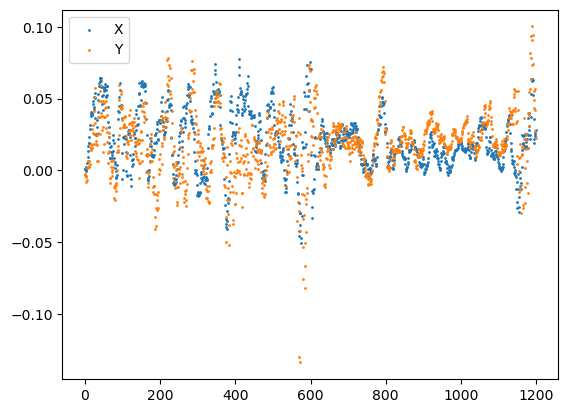

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm[0], s = 1, label="Y")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
#ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en x: ", max(Fx_norm[0]) - min(Fx_norm[0]))
print("Diferència forces en y: ", max(Fy_norm[0]) - min(Fy_norm[0]))

plt.legend()

plt.show()

### Accelerómetre 

In [22]:
resultat=[]
resultat=grafica(RGA1)

In [23]:
Fz_norm_IMU = normalize([resultat[0]["accelerometerZ"]*masa.item()*9.81]) 
Fx_norm_IMU = normalize([resultat[0]["accelerometerX"]*masa.item()*9.81]) 
Fy_norm_IMU = normalize([resultat[0]["accelerometerY"]*masa.item()*9.81]) 

llista = list(range(0,len(Fz_norm_IMU[0])))

Diferència forces en z:  0.07228704561713217
Diferència forces en y:  0.03701690966920345


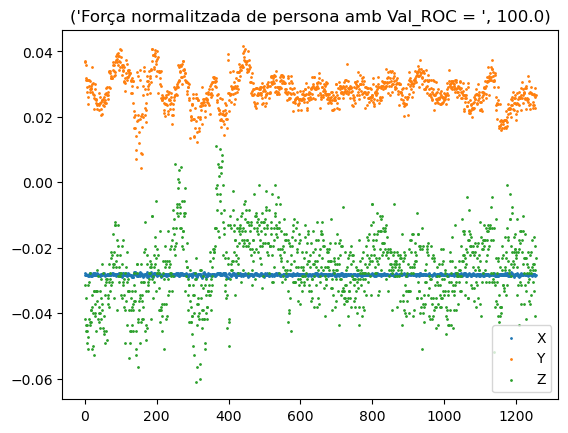

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm_IMU[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm_IMU[0], s = 1, label="Y")
ax1.scatter(llista, Fz_norm_IMU[0], s = 1, label="Z")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en z: ", max(Fz_norm_IMU[0]) - min(Fz_norm_IMU[0]))
print("Diferència forces en y: ", max(Fy_norm_IMU[0]) - min(Fy_norm_IMU[0]))

plt.legend()

plt.show()

### Vector Gravity

In [25]:
Fz_norm_IMU_gravity = normalize([resultat[0]["gravityVectorZ"]*masa.item()])
Fx_norm_IMU_gravity = normalize([resultat[0]["gravityVectorX"]*masa.item()])
Fy_norm_IMU_gravity = normalize([resultat[0]["gravityVectorY"]*masa.item()])

llista = list(range(0,len(Fz_norm_IMU_gravity[0])))

Diferència forces en z:  0.00022666777577539515
Diferència forces en y:  0.0002039048812733403


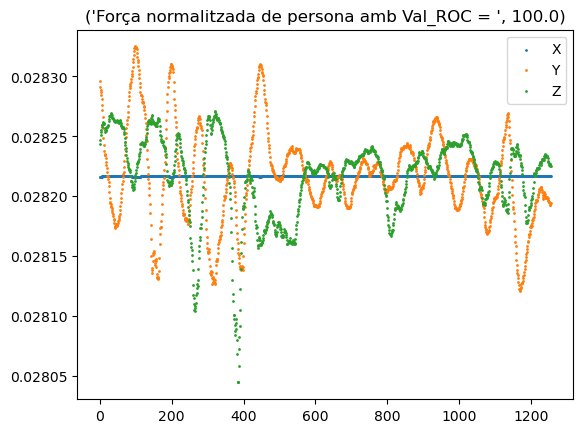

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm_IMU_gravity[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm_IMU_gravity[0], s = 1, label="Y")
ax1.scatter(llista, Fz_norm_IMU_gravity[0], s = 1, label="Z")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en z: ", max(Fz_norm_IMU_gravity[0]) - min(Fz_norm_IMU_gravity[0]))
print("Diferència forces en y: ", max(Fy_norm_IMU_gravity[0]) - min(Fy_norm_IMU_gravity[0]))

plt.legend()

plt.show()

## Agrupar Dades IMU per edat

Hi ha 5 grups d'edat entre els 68 i els 73 anys, un per cada any.

In [27]:
import os

txt = []
csv = []
scores = []

for i in range(6):
    txt.append([])
    csv.append([])
    scores.append([])
        
for filename in os.listdir("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU"):
     if filename.endswith(".txt"): 
        underscore_index = filename.rfind("_")
        dot_index = filename.rfind(".")
        codi = filename[underscore_index+1:dot_index]
        
        reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/" + filename, delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)
        df_dades = reader.get_chunk()
        
        txt[df_dades[9].item()-68].append("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/" + filename)
        scores[df_dades[9].item()-68].append(df_dades[[17]].values[0][0])
        scores[df_dades[9].item()-68].append(df_dades[[22]].values[0][0])
        scores[df_dades[9].item()-68].append(df_dades[[27]].values[0][0])
        scores[df_dades[9].item()-68].append(df_dades[[32]].values[0][0])
        
        for filename2 in os.listdir("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU"):
            if filename2.endswith(".csv"):       
                if codi.lower() in filename2.lower():
                    csv[df_dades[9].item()-68].append("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/" + filename2)        
scores = scores[0] + scores[1] + scores[2] + scores[3] + scores[4] + scores[5] 

In [194]:
valors_acc = []
valors_grav = []
valors_quat = []

dades_quat_raw = []
dades_acc_raw = []
dades_grav_raw = []
edat = []
prova = []
tag = []

deltat = 1/40

for i in range(6):
    valors_acc.append([])
    valors_grav.append([])
    valors_quat.append([])

for i in range(len(valors_acc)):
    for j in range(4):
        valors_acc[i].append([])
        valors_grav[i].append([])
        valors_quat[i].append([])
        
#print(valors_acc)
#print(valors_grav)

for index, rang in enumerate(csv):
    for file in rang:
        edat.append(68 + index)
        edat.append(68 + index)
        edat.append(68 + index)
        edat.append(68 + index)
        barra_index = file.rfind("/")        
        tag.append(file[barra_index+4:barra_index+9])
        tag.append(file[barra_index+4:barra_index+9])
        tag.append(file[barra_index+4:barra_index+9])
        tag.append(file[barra_index+4:barra_index+9])
        dades = pd.read_csv(file, delimiter=";")
        convertData(dades,"accelerometerY",10)
        convertData(dades,"accelerometerZ",10)
        convertData(dades,"accelerometerX",10)        
        convertDataHex(dades,"gravityVectorY",10)
        convertDataHex(dades,"gravityVectorZ",10)
        convertDataHex(dades,"gravityVectorX",10)
        convertDataHex(dades,"gyroscopeX",10)
        convertDataHex(dades,"gyroscopeY",10)
        convertDataHex(dades,"gyroscopeZ",10) 
                
        balance_test = dades.loc[dades["test"]==5, ["action","accelerometerX","accelerometerY","accelerometerZ", "gravityVectorY", "gravityVectorZ", "gyroscopeX", "gyroscopeY", "gyroscopeZ"]]
        llista_ROA = balance_test.index[balance_test["action"] == 1].tolist()
        llista_ROC = balance_test.index[balance_test["action"] == 2].tolist()
        llista_RGA = balance_test.index[balance_test["action"] == 3].tolist()
        llista_RGC = balance_test.index[balance_test["action"] == 4].tolist()
        balance_test.drop("action", inplace=True, axis=1)       
        
        prova.append("ROA")
        prova.append("ROC")        
        prova.append("RGA")        
        prova.append("RGC")        
        
        if len(llista_ROA) > 1:
            ind, missing_value = find_discontinuity(llista_ROA)
            ROA1 = [*range(llista_ROA[0], missing_value)]

            resultat=grafica(ROA1)
            
            rotated_vector = np.array([1.0,0.0,0.0])
            trajectoriax = [rotated_vector[0]]
            trajectoriay = [rotated_vector[1]]
            trajectoriaz = [rotated_vector[2]]
            
            AHRSalgorithm = AHRS(SamplePeriod=1/40, Kp=1,Ki=1, KpInit=1)

            for i in range(len(resultat[0])):
                AHRSalgorithm.Kp = 0
                AHRSalgorithm.UpdateIMU(resultat[0][['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].iloc[i].values.tolist(), 
                                        resultat[0][['accelerometerX', 'accelerometerX', 'accelerometerX']].iloc[i].values.tolist())
                quaternions = AHRSalgorithm.Quaternion
                rotated_vector = quaternRotate(rotated_vector, quaternions)
                #print(rotated_vector)
                trajectoriax.append(trajectoriax[-1] + rotated_vector[0]*deltat)
                trajectoriay.append(trajectoriay[-1] + rotated_vector[1]*deltat)
                trajectoriaz.append(trajectoriaz[-1] + rotated_vector[2]*deltat)
                
            valors_quat[index][0].append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            dades_quat_raw.append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            valors_acc[index][0].append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])]) 

            valors_grav[index][0].append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])]) 
            
            dades_acc_raw.append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])])
            
            dades_grav_raw.append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])])  
        else:
            valors_quat[index][0].append([2,2])
            valors_acc[index][0].append([2,2])
            valors_grav[index][0].append([2,2])
            dades_acc_raw.append([2,2])
            dades_grav_raw.append([2,2])
            dades_quat_raw.append([2,2])
            
            print("El fitxer ", file, " ", "no té prova ROA")
            
        if len(llista_ROC) > 1:
            ind, missing_value = find_discontinuity(llista_ROC)
            ROC1 = [*range(llista_ROC[0], missing_value)]

            resultat=grafica(ROC1)
            
            rotated_vector = np.array([1.0,0.0,0.0])
            trajectoriax = [rotated_vector[0]]
            trajectoriay = [rotated_vector[1]]
            trajectoriaz = [rotated_vector[2]]
            
            AHRSalgorithm = AHRS(SamplePeriod=1/40, Kp=1,Ki=1, KpInit=1)

            for i in range(len(resultat[0])):
                AHRSalgorithm.Kp = 0
                AHRSalgorithm.UpdateIMU(resultat[0][['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].iloc[i].values.tolist(), 
                                        resultat[0][['accelerometerX', 'accelerometerX', 'accelerometerX']].iloc[i].values.tolist())
                quaternions = AHRSalgorithm.Quaternion
                rotated_vector = quaternRotate(rotated_vector, quaternions)
                #print(rotated_vector)
                trajectoriax.append(trajectoriax[-1] + rotated_vector[0]*deltat)
                trajectoriay.append(trajectoriay[-1] + rotated_vector[1]*deltat)
                trajectoriaz.append(trajectoriaz[-1] + rotated_vector[2]*deltat)
            
            valors_quat[index][1].append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            dades_quat_raw.append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])            
            
            valors_acc[index][1].append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])]) 

            valors_grav[index][1].append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])]) 


            dades_acc_raw.append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])])
            
            dades_grav_raw.append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])])
        else:
            valors_quat[index][0].append([2,2])
            valors_acc[index][1].append([2,2])
            valors_grav[index][1].append([2,2])
            dades_acc_raw.append([2,2])
            dades_grav_raw.append([2,2])
            dades_quat_raw.append([2,2])
            print("El fitxer ", file, " ", "no té prova ROC")
        
        if len(llista_RGA) > 1:        
            ind, missing_value = find_discontinuity(llista_RGA)
            RGA1 = [*range(llista_RGA[0], missing_value)]

            resultat=grafica(RGA1)
            
            rotated_vector = np.array([1.0,0.0,0.0])
            trajectoriax = [rotated_vector[0]]
            trajectoriay = [rotated_vector[1]]
            trajectoriaz = [rotated_vector[2]]
            
            AHRSalgorithm = AHRS(SamplePeriod=1/40, Kp=1,Ki=1, KpInit=1)

            for i in range(len(resultat[0])):
                AHRSalgorithm.Kp = 0
                AHRSalgorithm.UpdateIMU(resultat[0][['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].iloc[i].values.tolist(), 
                                        resultat[0][['accelerometerX', 'accelerometerX', 'accelerometerX']].iloc[i].values.tolist())
                quaternions = AHRSalgorithm.Quaternion
                rotated_vector = quaternRotate(rotated_vector, quaternions)
                #print(rotated_vector)
                trajectoriax.append(trajectoriax[-1] + rotated_vector[0]*deltat)
                trajectoriay.append(trajectoriay[-1] + rotated_vector[1]*deltat)
                trajectoriaz.append(trajectoriaz[-1] + rotated_vector[2]*deltat)
            
            valors_quat[index][2].append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            dades_quat_raw.append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            valors_acc[index][2].append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])]) 

            valors_grav[index][2].append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])]) 

            
            dades_acc_raw.append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])])
            
            dades_grav_raw.append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])])
        else:
            valors_quat[index][0].append([2,2])
            valors_acc[index][2].append([2,2])
            valors_grav[index][2].append([2,2])
            dades_acc_raw.append([2,2])
            dades_grav_raw.append([2,2])
            dades_quat_raw.append([2,2])
            print("El fitxer ", file, " ", "no té prova RGA")

        if len(llista_RGC) > 1:
            ind, missing_value = find_discontinuity(llista_RGC)
            RGC1 = [*range(llista_RGC[0], missing_value)]

            resultat=grafica(RGC1)
            
            rotated_vector = np.array([1.0,0.0,0.0])
            trajectoriax = [rotated_vector[0]]
            trajectoriay = [rotated_vector[1]]
            trajectoriaz = [rotated_vector[2]]
            
            AHRSalgorithm = AHRS(SamplePeriod=1/40, Kp=1,Ki=1, KpInit=1)

            for i in range(len(resultat[0])):
                AHRSalgorithm.Kp = 0
                AHRSalgorithm.UpdateIMU(resultat[0][['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].iloc[i].values.tolist(), 
                                        resultat[0][['accelerometerX', 'accelerometerX', 'accelerometerX']].iloc[i].values.tolist())
                quaternions = AHRSalgorithm.Quaternion
                rotated_vector = quaternRotate(rotated_vector, quaternions)
                #print(rotated_vector)
                trajectoriax.append(trajectoriax[-1] + rotated_vector[0]*deltat)
                trajectoriay.append(trajectoriay[-1] + rotated_vector[1]*deltat)
                trajectoriaz.append(trajectoriaz[-1] + rotated_vector[2]*deltat)
            
            valors_quat[index][3].append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            dades_quat_raw.append([max(trajectoriaz) - min(trajectoriaz), max(trajectoriay) - min(trajectoriay)])
            
            valors_acc[index][3].append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])]) 

            valors_grav[index][3].append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])]) 
            
            dades_acc_raw.append([max(normalize([resultat[0]["accelerometerZ"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerZ"]*9.81])[0]),
                                  max(normalize([resultat[0]["accelerometerY"]*9.81])[0]) - min(normalize([resultat[0]["accelerometerY"]*9.81])[0])])
            
            dades_grav_raw.append([max(normalize([resultat[0]["gravityVectorZ"]])[0]) - min(normalize([resultat[0]["gravityVectorZ"]])[0]),
                                   max(normalize([resultat[0]["gravityVectorY"]])[0]) - min(normalize([resultat[0]["gravityVectorY"]])[0])])
        else:
            valors_quat[index][0].append([2,2])
            valors_acc[index][3].append([2,2])
            valors_grav[index][3].append([2,2])
            dades_acc_raw.append([2,2])
            dades_grav_raw.append([2,2])
            dades_quat_raw.append([2,2])
            print("El fitxer ", file, " ", "no té prova RGC")           

El fitxer  C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_AB55F_DATA_25-04-2023_HORA_16-53-47.234.csv   no té prova RGC


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8136\1754359350.py:39: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  dades = pd.read_csv(file, delimiter=";")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8136\1754359350.py:39: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dades = pd.read_csv(file, delimiter=";")


El fitxer  C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_ap51f_DATA_07-03-2023_HORA_15-58-56.345.csv   no té prova RGC
El fitxer  C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_FM51F_DATA_25-04-2023_HORA_15-11-47.234.csv   no té prova ROA


In [ ]:
x, y = zip(*valors_acc[3][3])
plt.scatter(x,y)

In [106]:
def obtenir_x_valors(llista, valor):
    """
    Obtiene todos los primeros valores de una lista de listas con dos valores.

    Args:
    lista_de_listas: La lista de listas con dos valores.

    Returns:
    Una lista con todos los primeros valores.
    """

    valors = []
    for l in llista:
        valors.append(l[valor])

    return valors

In [196]:
dades = {'Forca_maxima_acc_x': obtenir_x_valors(dades_acc_raw, 0), 'Forca_maxima_acc_y': obtenir_x_valors(dades_acc_raw, 1) ,
         'Forca_maxima_grav_x': obtenir_x_valors(dades_grav_raw, 0), 'Forca_maxima_grav_y': obtenir_x_valors(dades_grav_raw, 1),
         'Desplacament_maxim_x': obtenir_x_valors(dades_quat_raw, 0), 'Desplacament_maxim_y': obtenir_x_valors(dades_quat_raw, 1),
         'Prova': prova, 'Puntuacio': scores, 'Edat': edat, 'Etiqueta': tag}
df = pd.DataFrame(data=dades)
dades_forca = df.replace('-', 0)
dades_forca

,Forca_maxima_acc_x,Forca_maxima_acc_y,Forca_maxima_grav_x,Forca_maxima_grav_y,Desplacament_maxim_x,Desplacament_maxim_y,Prova,Puntuacio,Edat,Etiqueta
0,0.053711,0.034180,442476,505866,1.148919,0.933014,ROA,100.000000,68,gp53f
1,0.075195,0.034180,889659,780767,1.625589,0.794690,ROC,100.000000,68,gp53f
2,0.069336,0.062500,785160,2800466,0.815465,0.604454,RGA,99.076211,68,gp53f
3,0.114258,0.083984,1323349,3903831,0.701697,0.823534,RGC,100.000000,68,gp53f
4,0.052734,0.030273,1034813943,492059,1.755809,0.646743,ROA,100.000000,68,tf54f
...,...,...,...,...,...,...,...,...,...,...
223,0.415039,0.579102,2231193993,2224000384,0.733434,0.775283,RGC,0.000000,72,RY51M
224,0.077148,0.034180,1041722836,1860282,0.747834,1.298206,ROA,99.525302,73,pc50f
225,0.099609,0.048828,1041613142,3075365,1.031837,0.920593,ROC,88.551353,73,pc50f
226,0.079102,0.078125,1041837584,4191048,0.823704,1.877677,RGA,100.000000,73,pc50f


In [167]:
df.to_csv('C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/dades_força_IMU.csv')

In [211]:
dades_forca = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/dades_força_IMU.csv", dtype={'Forca_maxima_acc_x': float, 'Forca_maxima_acc_y': float, 'Forca_maxima_grav_x': float, 'Forca_maxima_grav_y': float, 'Puntuacio':float}).drop('Unnamed: 0', axis=1)
dades_forca

,Forca_maxima_acc_x,Forca_maxima_acc_y,Forca_maxima_grav_x,Forca_maxima_grav_y,Desplacament_maxim_x,Desplacament_maxim_y,Prova,Puntuacio,Edat,Etiqueta
0,0.002841,0.006206,0.000012,0.000014,1.148919,0.933014,ROA,100.000000,68,gp53f
1,0.004113,0.006341,0.000024,0.000021,1.625589,0.794690,ROC,100.000000,68,gp53f
2,0.003582,0.011361,0.000021,0.000075,0.815465,0.604454,RGA,99.076211,68,gp53f
3,0.005997,0.015339,0.000035,0.000105,0.701697,0.823534,RGC,100.000000,68,gp53f
4,0.007705,0.006597,0.029387,0.000013,1.755809,0.646743,ROA,100.000000,68,tf54f
...,...,...,...,...,...,...,...,...,...,...
223,0.308995,0.339085,0.044964,0.043858,0.733434,0.775283,RGC,0.000000,72,RY51M
224,0.006137,0.018437,0.029069,0.000017,0.747834,1.298206,ROA,99.525302,73,pc50f
225,0.008268,0.023030,0.029567,0.000028,1.031837,0.920593,ROC,88.551353,73,pc50f
226,0.006263,0.042001,0.029780,0.000038,0.823704,1.877677,RGA,100.000000,73,pc50f


In [212]:
dades_forca_ROA = dades_forca.loc[(dades_forca['Prova'] == 'ROA')]
dades_forca_ROC = dades_forca.loc[(dades_forca['Prova'] == 'ROC')]
dades_forca_RGA = dades_forca.loc[(dades_forca['Prova'] == 'RGA')]
dades_forca_RGC = dades_forca.loc[(dades_forca['Prova'] == 'RGC')]

In [231]:
dades_forca_ROA_mal = dades_forca_ROA.loc[(dades_forca_ROA['Puntuacio'] < 90)]
dades_forca_ROA_bo = dades_forca_ROA.loc[(dades_forca_ROA['Puntuacio']) >= 90]

dades_forca_ROC_mal = dades_forca_ROC.loc[(dades_forca_ROC['Puntuacio'] < 90)]
dades_forca_ROC_bo = dades_forca_ROC.loc[(dades_forca_ROC['Puntuacio']) >= 90]

dades_forca_RGA_mal = dades_forca_RGA.loc[(dades_forca_RGA['Puntuacio'] < 90)]
dades_forca_RGA_bo = dades_forca_RGA.loc[(dades_forca_RGA['Puntuacio']) >= 90]

dades_forca_RGC_mal = dades_forca_RGC.loc[(dades_forca_RGC['Puntuacio'] < 80)]
dades_forca_RGC_bo = dades_forca_RGC.loc[(dades_forca_RGC['Puntuacio']) >= 80]

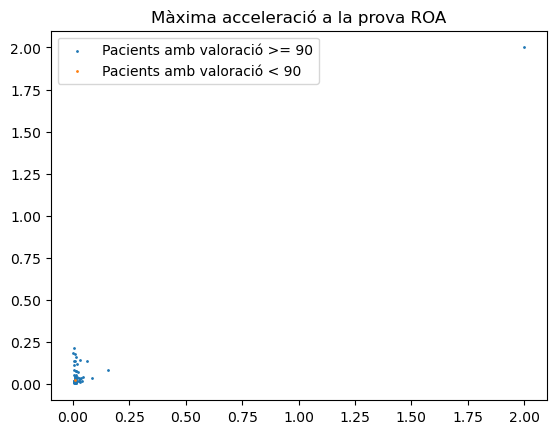

In [270]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROA_bo['Forca_maxima_acc_x'], dades_forca_ROA_bo['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROA_mal['Forca_maxima_acc_x'], dades_forca_ROA_mal['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima acceleració a la prova ROA")
plt.legend()


plt.show()

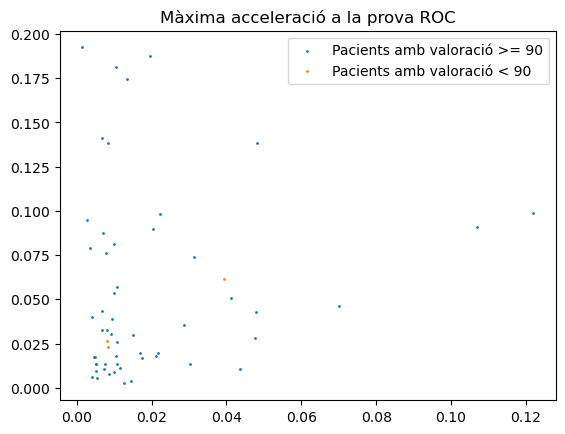

In [271]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROC_bo['Forca_maxima_acc_x'], dades_forca_ROC_bo['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROC_mal['Forca_maxima_acc_x'], dades_forca_ROC_mal['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima acceleració a la prova ROC")
plt.legend()


plt.show()

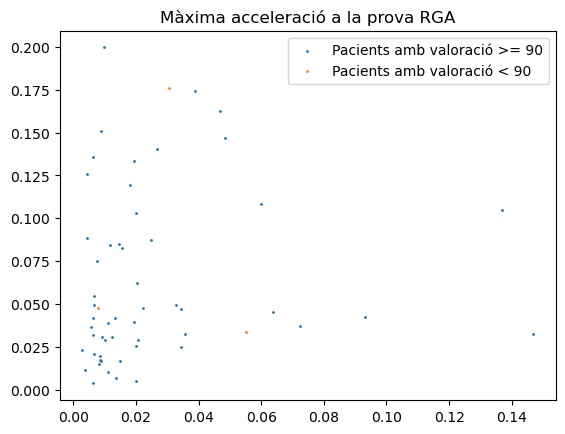

In [272]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGA_bo['Forca_maxima_acc_x'], dades_forca_RGA_bo['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGA_mal['Forca_maxima_acc_x'], dades_forca_RGA_mal['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima acceleració a la prova RGA")
plt.legend()


plt.show()

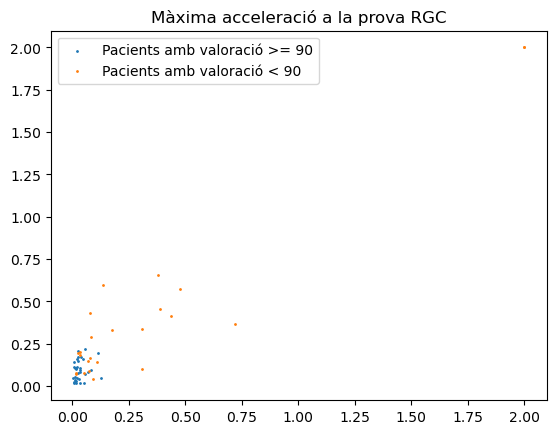

In [273]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGC_bo['Forca_maxima_acc_x'], dades_forca_RGC_bo['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGC_mal['Forca_maxima_acc_x'], dades_forca_RGC_mal['Forca_maxima_acc_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima acceleració a la prova RGC")
plt.legend()


plt.show()

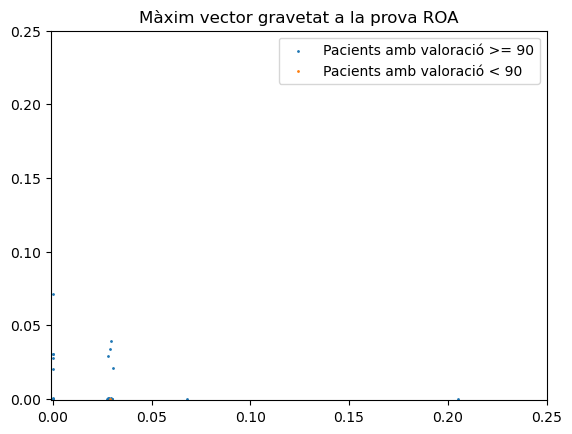

In [274]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROA_bo['Forca_maxima_grav_x'], dades_forca_ROA_bo['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROA_mal['Forca_maxima_grav_x'], dades_forca_ROA_mal['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim vector gravetat a la prova ROA")
ax1.set_xlim(-0.001,0.25)
ax1.set_ylim(-0.001,0.25)
plt.legend()


plt.show()

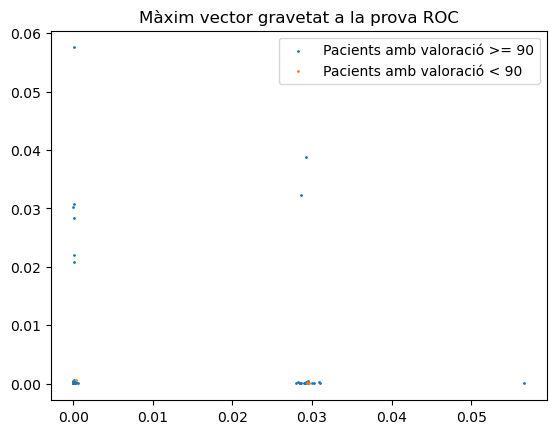

In [275]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROC_bo['Forca_maxima_grav_x'], dades_forca_ROC_bo['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROC_mal['Forca_maxima_grav_x'], dades_forca_ROC_mal['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim vector gravetat a la prova ROC")
plt.legend()


plt.show()

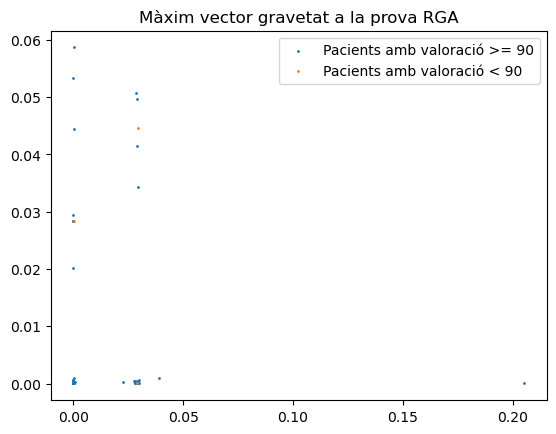

In [276]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGA_bo['Forca_maxima_grav_x'], dades_forca_RGA_bo['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGA_mal['Forca_maxima_grav_x'], dades_forca_RGA_mal['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim vector gravetat a la prova RGA")
plt.legend()


plt.show()

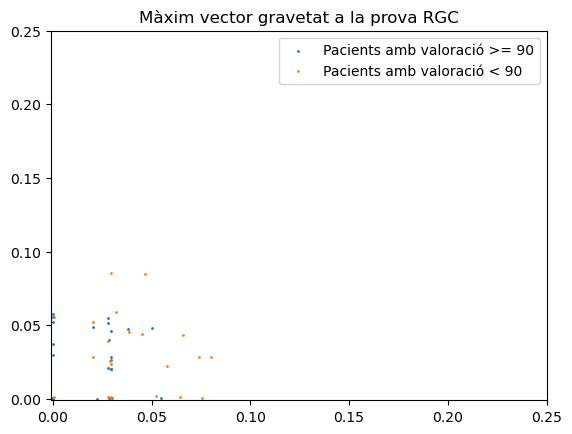

In [277]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGC_bo['Forca_maxima_grav_x'], dades_forca_RGC_bo['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGC_mal['Forca_maxima_grav_x'], dades_forca_RGC_mal['Forca_maxima_grav_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim vector gravetat a la prova RGC")
ax1.set_xlim(-0.001,0.25)
ax1.set_ylim(-0.001,0.25)
plt.legend()


plt.show()

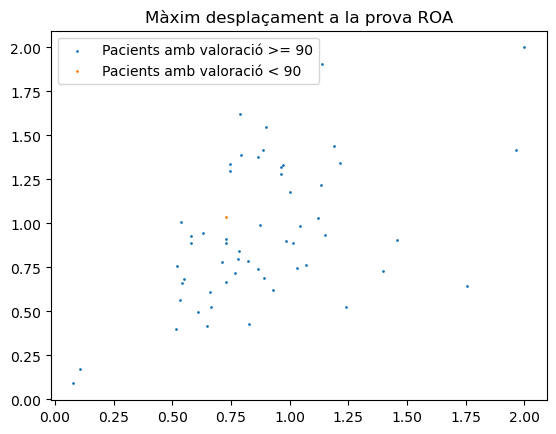

In [278]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROA_bo['Desplacament_maxim_x'], dades_forca_ROA_bo['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROA_mal['Desplacament_maxim_x'], dades_forca_ROA_mal['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova ROA")
plt.legend()


plt.show()

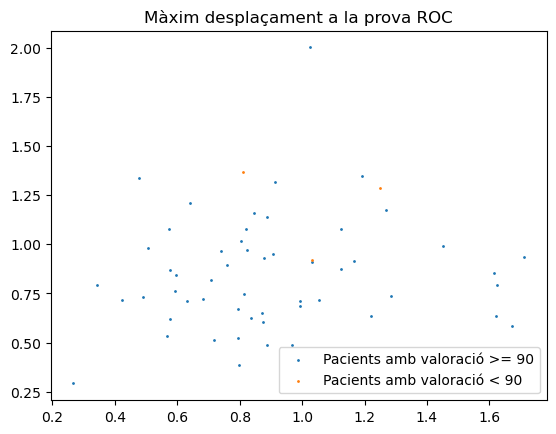

In [279]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_ROC_bo['Desplacament_maxim_x'], dades_forca_ROC_bo['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_ROC_mal['Desplacament_maxim_x'], dades_forca_ROC_mal['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova ROC")
plt.legend()


plt.show()

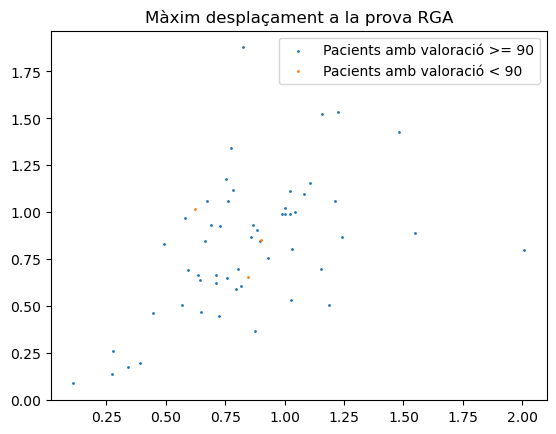

In [280]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGA_bo['Desplacament_maxim_x'], dades_forca_RGA_bo['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGA_mal['Desplacament_maxim_x'], dades_forca_RGA_mal['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova RGA")
plt.legend()


plt.show()

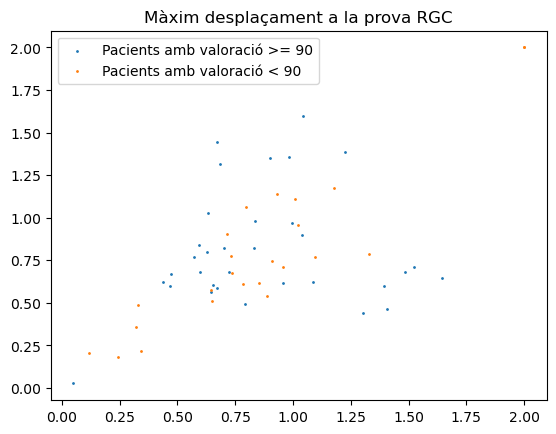

In [281]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dades_forca_RGC_bo['Desplacament_maxim_x'], dades_forca_RGC_bo['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(dades_forca_RGC_mal['Desplacament_maxim_x'], dades_forca_RGC_mal['Desplacament_maxim_y'], s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova RGC")
plt.legend()


plt.show()